# Example usage of difference_estimation_plot.py
## for mean/median comparison between groups


In [1]:
import importlib
import numpy as np
import difference_estimation_plot as dpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import dabest
import pandas as pd

In [6]:
importlib.reload(dpl)

<module 'difference_estimation_plot' from '/Users/GiuseppePietro/Python/difference_estimation_plot/difference_estimation_plot.py'>

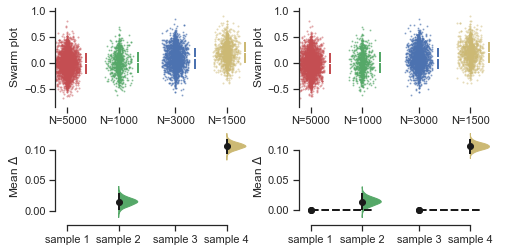

In [7]:
## Unpaired example:
a = .2
input_ = {'sample 1': a*np.random.normal(size=(5000)), 'sample 2': a*np.random.normal(size=(1000)) + 0.01,
     'sample 3': a*np.random.normal(size=(3000)) +0.1, 'sample 4': a*np.random.normal(size=(1500)) +.2}
KEYS = list(input_.keys());

axs = dpl.nested_subplots()
ax, m, ci = dpl.estimation_plot(input_, [KEYS[:2],KEYS[2:]], operation=np.mean, nsh=5000,
                                 ci=.95, color_palette=['r', 'g', 'b', 'y'], paired=False,
                                 axs=axs[0], vertical=1, figsize=(6,4), trend=0, spread=3,
                              bootPlot_kw={'ci_size':6,'ci_width':2,'ref_width':2},
                              swarmPlot_kw={'s':1,'m':'o', 'mfc':['none',1,1,'none'],
                                            'es_width':2})

ax, m, ci = dpl.estimation_plot(input_, [KEYS[:2],KEYS[2:]], operation=np.mean, nsh=5000,ci=.95,
                              color_palette=['r', 'g', 'b', 'y'], paired=False, axs=axs[1],
                              vertical=1, figsize=(6,4), trend=0, spread=3,
                              bootPlot_kw={'ci_size':6,'ci_width':2,'ref_width':2},
                              swarmPlot_kw={'s':1,'m':'o', 'mfc':['none',1,1,'none'],
                                            'es_width':2})

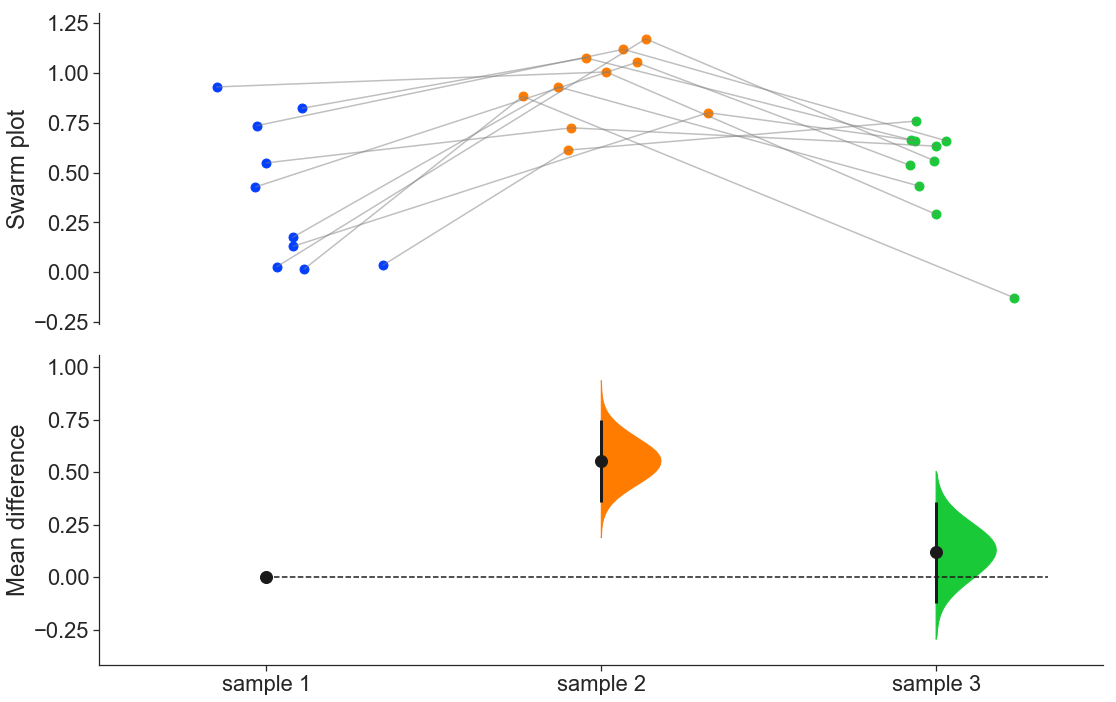

In [6]:
## Paired example:
input_ = {'sample 1': np.random.rand(10), 'sample 2': np.random.rand(10) + 0.4,
     'sample 3': np.random.rand(10) - 0.2}
KEYS = list(input_.keys())
fig,m,ci = dpl.estimation_plot(input_, [KEYS], trend=1, SMOOTH=[1,3], paired=True)

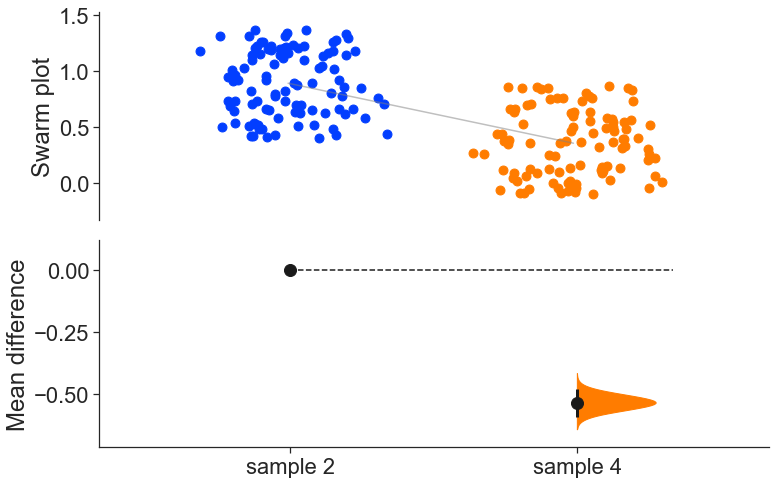

In [11]:
## Median difference example:
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
     'sample 3': np.random.rand(200) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,axs = dpl.estimation_plot(input_, [[KEYS[1],KEYS[3]]], trend=1, operation=np.mean, nsh=10000,
                              stat=0, SMOOTH=[1,3], spread=3)

In [17]:
lista = [[KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]], [KEYS[1],KEYS[3]]] #, [KEYS[2]]]
nc = 0
for l in lista:
    nc+=len(l)

print(nc)

6


['sample 1', 'sample 2', 'sample 3', 'sample 4']
[[0.4271041864892177], [0.09765848637321702]] [[[0.35219996675930987, 0.5143556869241839]], [[0.017839229949764068, 0.1808258511378229]]]


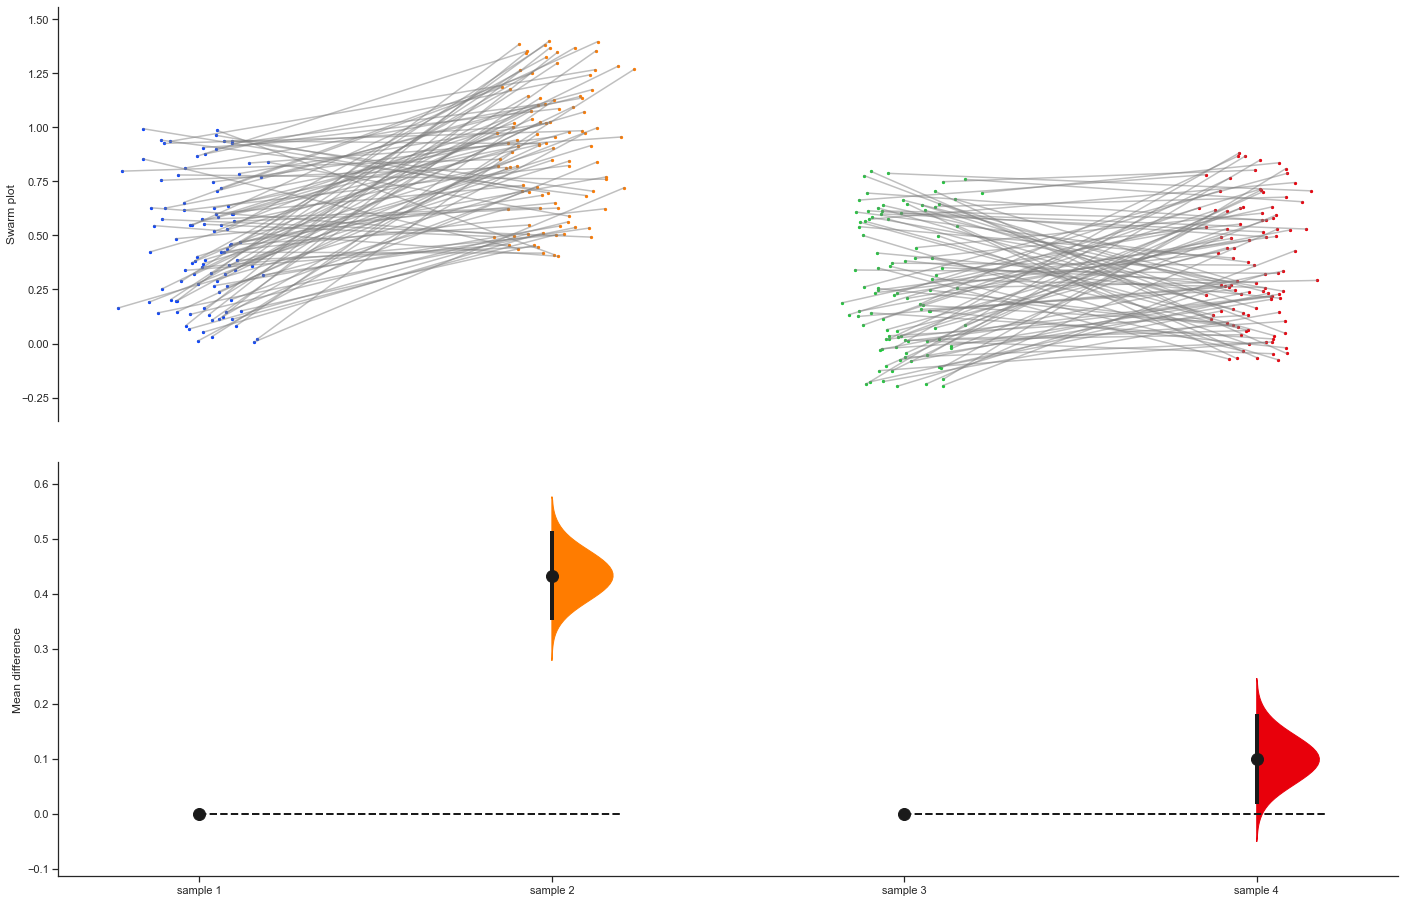

In [14]:
## Multiple controls
input_ = {'sample 1': np.random.rand(100), 'sample 2': np.random.rand(100) + 0.4,
         'sample 3': np.random.rand(100) - 0.2, 'sample 4': np.random.rand(100) - 0.1}
KEYS = list(input_.keys())
fig,m,ci = dpl.estimation_plot(input_, [KEYS[:2], KEYS[2:]], paired=True,\
                          vertical=1, nsh=5000, spread=5)
print(m,ci)